### https://www.kaggle.com/code/shubhijoshi/similar-image-finder-using-k-means

# Dwonload data

In [8]:
# ! pip install kaggle --upgrade
! cd notebooks/xai-survey && ls && kaggle datasets download -d paramaggarwal/fashion-product-images-small

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
 All_ref_500.csv   clusters-embeddings	 intents_500.xlsx
 archive.zip	   Data.xlsx		'RC6 nodes info(Abstract).xlsx'
 art_dataset	   HMRServer.jar	'RC6 nodes info.xlsx'
100%|███████████████████████████████████████▉| 565M/565M [00:51<00:00, 11.7MB/s]
100%|████████████████████████████████████████| 565M/565M [00:51<00:00, 11.5MB/s]


In [1]:
# ! apt-get install unzip
! cd notebooks/xai-survey && unzip fashion-product-images-small.zip

Archive:  fashion-product-images-small.zip
  inflating: images/10000.jpg        
  inflating: images/10001.jpg        
  inflating: images/10002.jpg        
  inflating: images/10003.jpg        
  inflating: images/10004.jpg        
  inflating: images/10005.jpg        
  inflating: images/10006.jpg        
  inflating: images/10007.jpg        
  inflating: images/10008.jpg        
  inflating: images/10009.jpg        
  inflating: images/10010.jpg        
  inflating: images/10011.jpg        
  inflating: images/10012.jpg        
  inflating: images/10013.jpg        
  inflating: images/10014.jpg        
  inflating: images/10015.jpg        
  inflating: images/10016.jpg        
  inflating: images/10017.jpg        
  inflating: images/10018.jpg        
  inflating: images/10019.jpg        
  inflating: images/10020.jpg        
  inflating: images/10021.jpg        
  inflating: images/10022.jpg        
  inflating: images/10023.jpg        
  inflating: images/10024.jpg        
  infla

In [5]:
! cd notebooks/xai-survey && ls

 All_ref_500.csv		    images
 art_dataset			    intents_500.xlsx
 clusters-embeddings		    myntradataset
 Data.xlsx			   'RC6 nodes info(Abstract).xlsx'
 fashion-product-images-small.zip  'RC6 nodes info.xlsx'
 HMRServer.jar			    styles.csv


# Importing Libraries

In [4]:
! pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil


# Loading data

In [7]:
input_dir = 'notebooks/xai-survey/images'

In [8]:
glob_dir = input_dir + '/*.jpg'
temp  = glob.glob(glob_dir)
print(len(temp))

44441


(44441, 128, 128, 3)


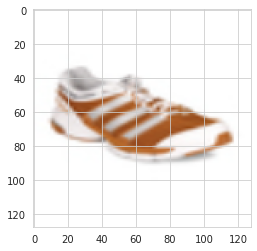

In [20]:
x=temp#[0:1000]
paths = [file for file in x]
images = [cv2.resize(cv2.imread(file), (128, 128)) for file in x]
images = np.array(np.float32(images).reshape(len(images),images[0].shape[0],images[0].shape[1],images[0].shape[2])/255)
print(images.shape)
plt.imshow(images[10])

In [22]:
# Getting embedded dara
## embedding
model = tf.keras.applications.MobileNetV2(include_top = False, weights='imagenet', input_shape=(128, 128, 3))
predictions = model.predict(images.reshape(-1, 128, 128, 3)) ## representation of image to reduce size
pred_images = predictions.reshape(images.shape[0], -1) ## reshape
pred_images.shape

(44441, 20480)

In [23]:
pred_images[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

# Plotting Silhoutte
To find optimal k in k means

In [18]:
#### Plotting Silhoutte score to find optimal K
sil = []
kl = []
kmax = 10

for k in range(2, kmax+1):
  print(k)
  kmeans2 = KMeans(n_clusters = k,random_state = 0).fit(pred_images)
  labels = kmeans2.labels_
  sil.append(silhouette_score(pred_images, labels))
  kl.append(k)

2
3
4
5
6
7
8
9
10


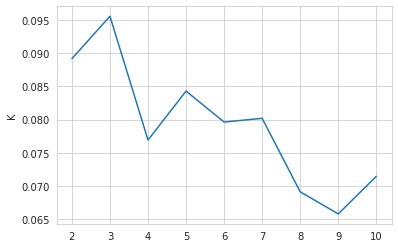

In [19]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

In [11]:
sil

[0.0877958,
 0.092303514,
 0.07571983,
 0.07735614,
 0.085218355,
 0.08759217,
 0.08941712,
 0.07361677,
 0.07485605]

# Training K-means
Here maximum is at k = 3 . But as this is fashion dataset so there can be many different types of clusters like based on gender , top or bottom etc. So, for this dataset k = 3 don't seems to be sufficient so choosing k = 8

In [12]:
k = 8
kmodel = KMeans(n_clusters=k, n_jobs=-1, random_state = 0) #change random state any value

kmodel.fit(pred_images) ### training kmean


kpredictions = kmodel.predict(pred_images) ###prediction
####

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


# Saving all clusters

In [13]:
#### Making output directory
for i in range(k):
    if(os.path.isdir("/kaggle/working/cluster" + str(i))==False):
        os.makedirs("/kaggle/working/cluster" + str(i))
    #print(i)
    ## for making directory
    
    
    ## Saving images in directory
for i in range(len(paths)):
    shutil.copy2(paths[i], "/kaggle/working/cluster"+str(kpredictions[i]))
####

# Plotting results

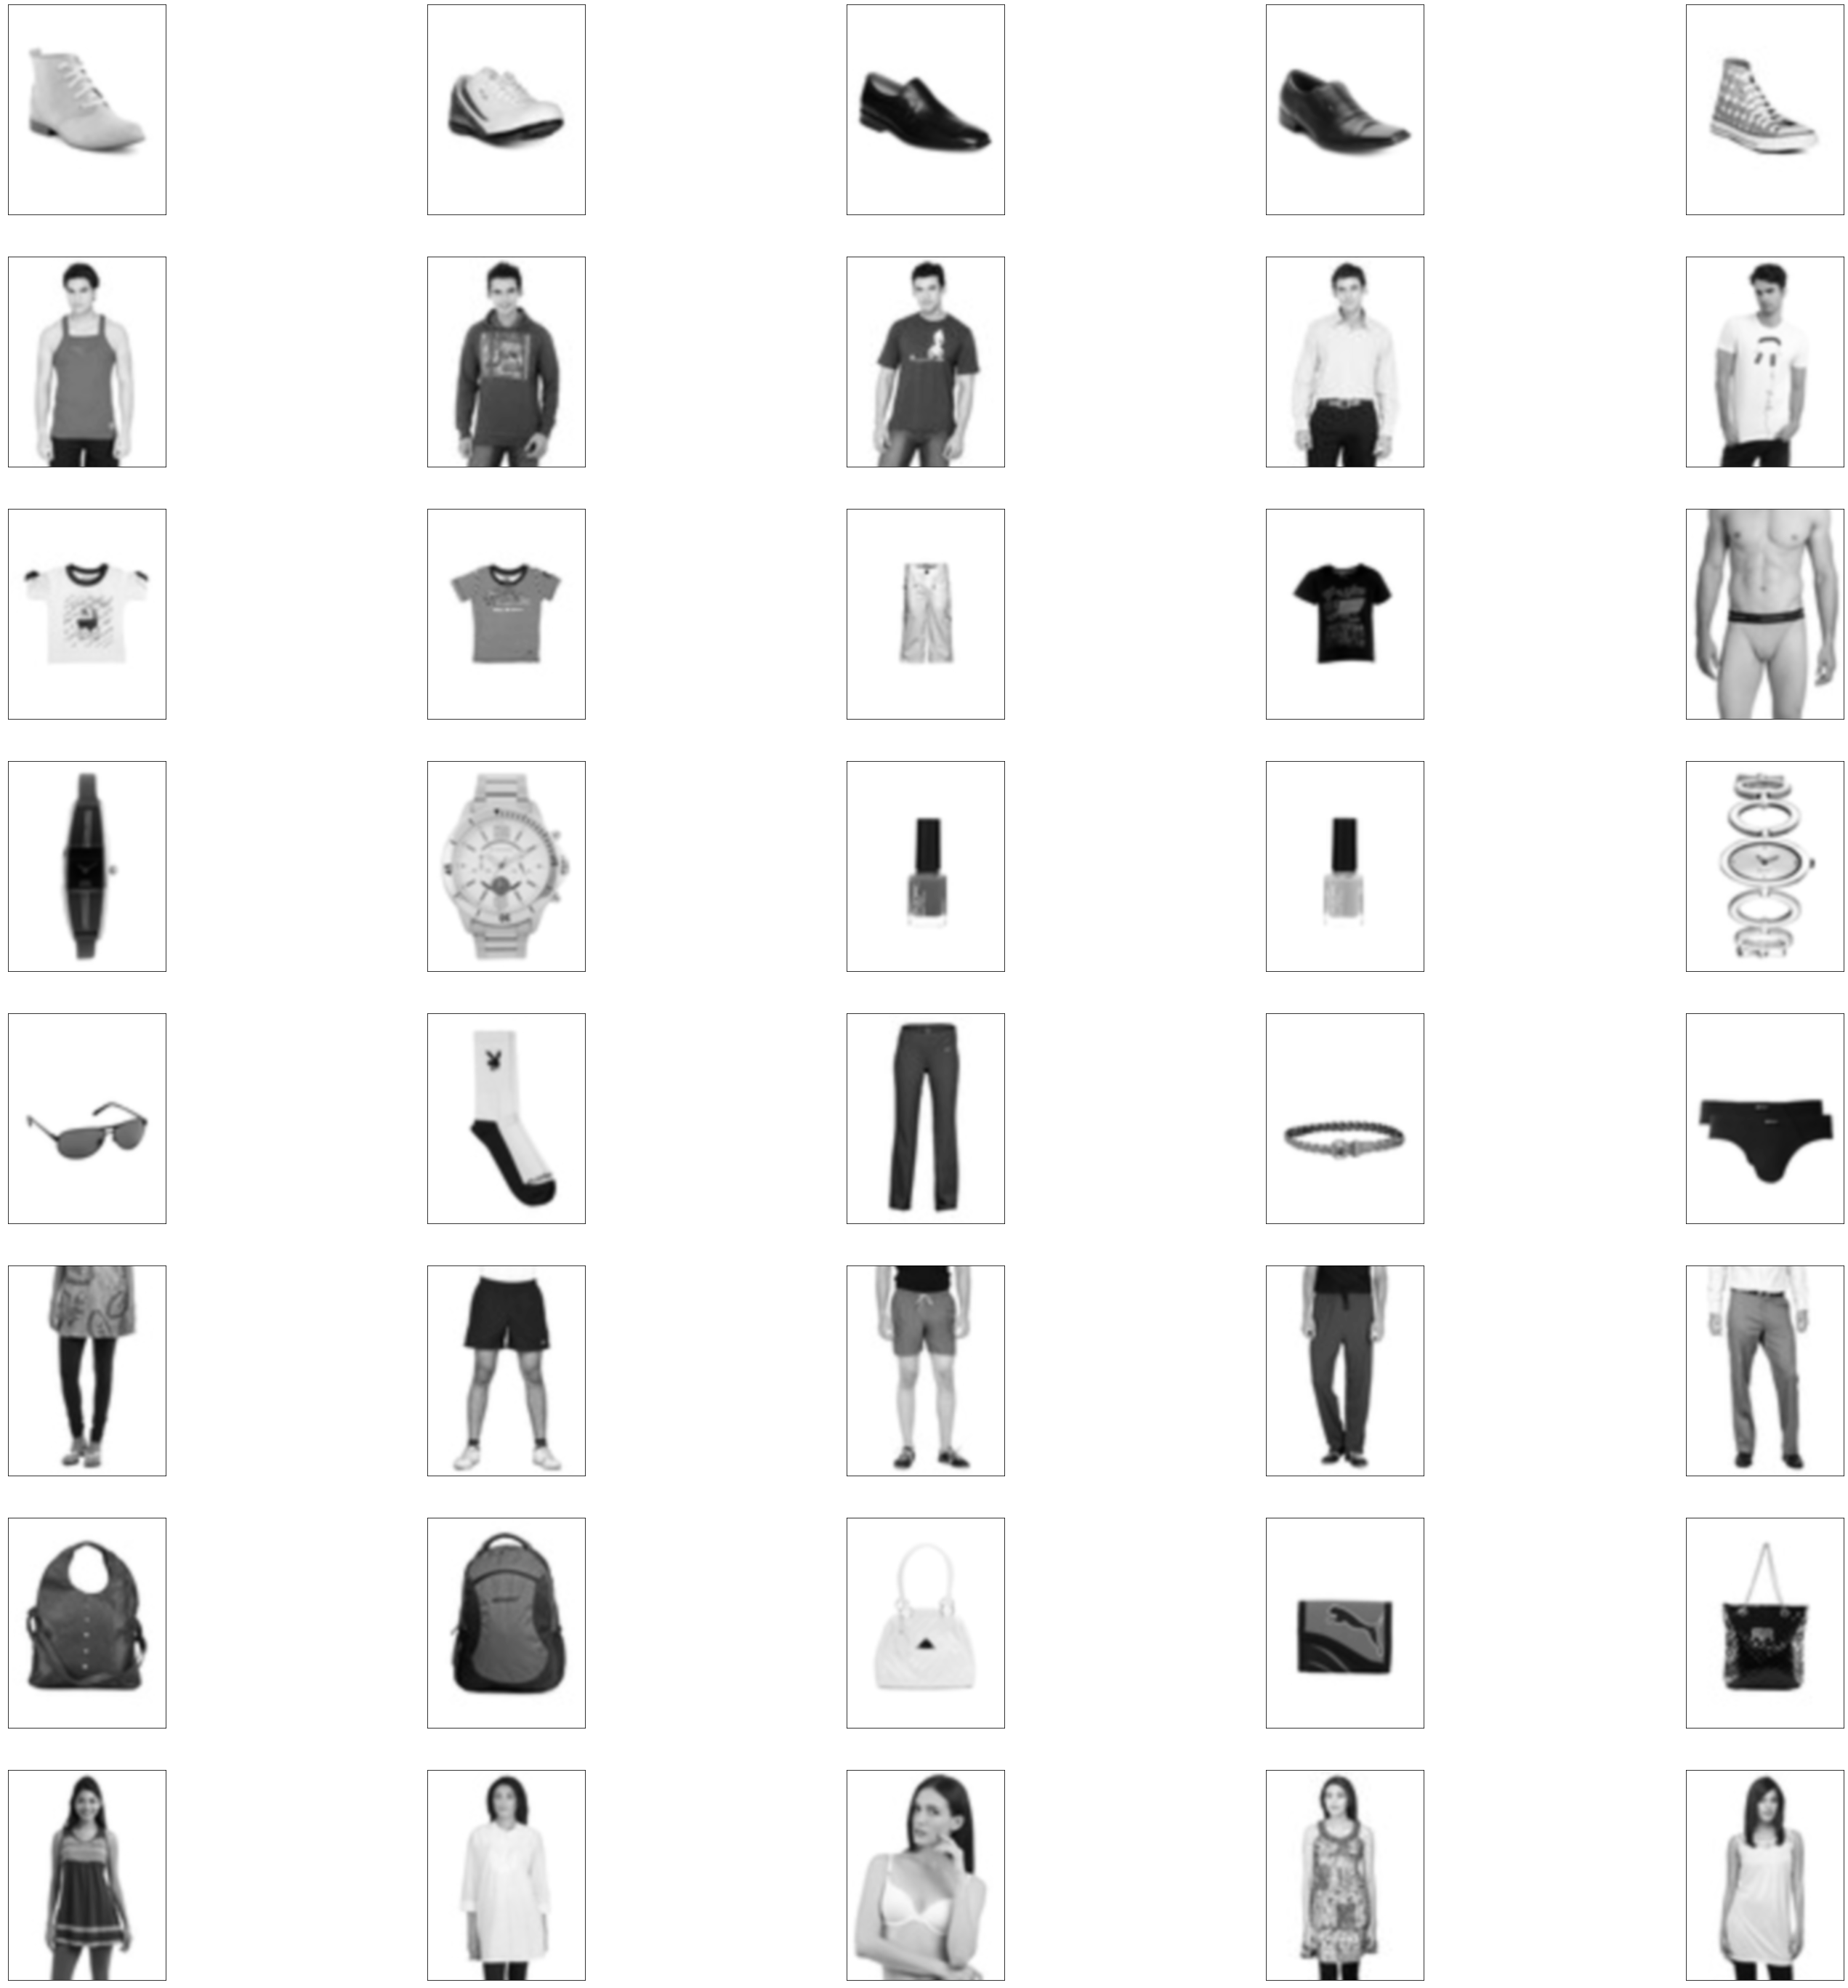

In [14]:
#### Plotting image from each cluster
fig ,axs = plt.subplots(k,5,figsize=(50,50)) ### making subplot 

for i in range(k):
    xyz = '/kaggle/working/cluster'+str(i) + '/*.jpg'
    img = [cv2.imread(abc,0) for abc in glob.glob(xyz)]
    
    
    #print("Cluster No "+str(i))
    for j in range(min(5, len(img))):
      axs[i][j].imshow(img[j], cmap = 'gray', interpolation = 'bicubic')
      axs[i][j].set_xticks([])
      axs[i][j].set_yticks([])
####